In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import sklearn


## *TASK 1 Non-linear Regression and Classification*

## **TASK 1** subtask 1

In [2]:
import h5py
hf = h5py.File('toy-regression.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()


**REPORT**

1. Approach: looking at the visualizations of features before modifications, we see that their graphs resemble abs function, that's why in feature engineering absolute values of features are taken into account. By experimenting with different functions and visualizing them with respect to targets, I included in the model the following modified features: 
* x1 and x1_test: original values of the first feature

* x1_abs and x1t_abs, x2_abs and x2t_abs: absolute values of x1/x2 for the training and test datasets after subtracting 1 for x1, and 2 for x2.

* x1x2 and x1x2_test: product of x1_abs and x2_abs for the training and test datasets. 

* logx1 and logx1_test, logx2 and logx2_test: natural logarithm of x1_abs/x2_abs for the training and test datasets. 

* x1_x2 and x1_x2_test: absolute difference between logx1 and logx2 

* sinex1 and sinex1_test, sinex2 and sinex2_test: the sine of x1_abs/x2_abs

* cosx2, and cosx2_test: cosine x2_abs/x2t_abs

* power_x1_train,power_x1_test: exponential transformations of x1_abs, x2_abs, x1t_abs, and x2t_abs, respectively. They are raised to the power of a=1/2, and b=1/2.

* sinx1x2 and sinx1x2_test: product of the sine values of x1_abs and x2_abs

2. Before modyfing features, we observe
* MSE train: 10.788886925040131
* MSE test: 9.971088497637169
    
    After modifications, the MSE lower than 0.01 on test data is achieved: 
    * MSE test: 0.00998059997434526

    When applied polynomial features, taking into account degrees in range [2,7] the best MSE with Polynomial Features (Degree 6) with MSE on test set: 0.1746019540795059


**Conclusion:** with feature modification we can achieve lower MSE, but the model becomes to complex and computations are slower.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#fuction to calculate linear model, return mse_train,mse_test
def linear_model(x_train,y_train,x_test,y_test):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_train)
    y_pred_test=lr.predict(x_test)
    mse_train = mean_squared_error(y_train, y_pred)
    mse_test = mean_squared_error(y_test, y_pred_test)
    return mse_train,mse_test


In [5]:
lin_mse_train,lin_mse_test=linear_model(x_train,y_train,x_test,y_test)
print("MSE train:",lin_mse_train)
print("MSE test:",lin_mse_test)


MSE train: 10.788886925040131
MSE test: 9.971088497637169


looking at features, not yet modified

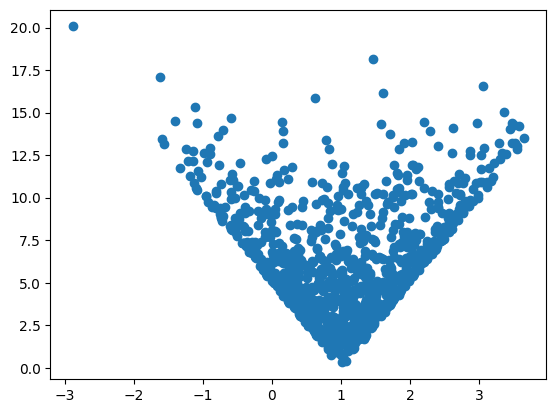

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0], y_train);

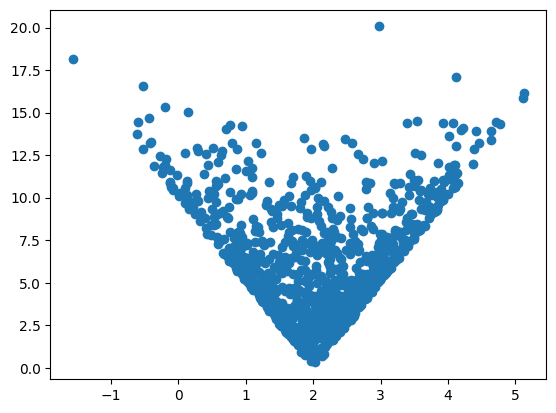

In [6]:
plt.scatter( x = x_train[:,1] , y = y_train)

In [7]:
#x1
x1=x_train[:,0]
x1_test=x_test[:,0]

#x2
x2=x_train[:,-1]
x2_test=x_test[:,-1]

#abs
x1_abs=np.abs(x1-1)
x1t_abs=np.abs(x1_test-1)
x2_abs=np.abs(x2-2)
x2t_abs=np.abs(x2_test-2)

#multiplication
x1x2=x1_abs*x2_abs
x1x2_test=x1t_abs*x2t_abs

#logarithmic
logx1=np.log(x1_abs)
logx1_test=np.log(x1t_abs)

logx2=np.log(x2_abs) ##not sure if important
logx2_test=np.log(x2t_abs)

#difference
x1_x2=np.abs(logx1-logx2)
x1_x2_test=np.abs(logx1_test-logx2_test)


#sinus
sinex1=np.sin(x1_abs)
sinex1_test=np.sin(x1t_abs)

sinex2=np.sin(x2_abs)
sinex2_test=np.sin(x2t_abs)


#cosinus
cosx1=np.cos(x1_abs)
cosx1_test=np.cos(x1t_abs)
cosx2=np.cos(x2_abs)
cosx2_test=np.cos(x2t_abs)


#exponential
a=1/2
b=1/2
power_x1_train=a**(x1_abs)
power_x2_train=b**x2_abs ### important
power_x1_test=a**(x1t_abs)
power_x2_test=b**x2t_abs


#sin_mult

sinx1x2=sinex1*sinex2
sinx1x2_test=sinex1_test*sinex2_test



#model


model_train=[x1,x1_abs,x2_abs,logx1,logx2,sinex1,sinex2, cosx2,sinx1x2,power_x1_train,x1_x2,x1x2]
model_test=[x1_test,x1t_abs,x2t_abs,logx1_test,logx2_test,sinex1_test,sinex2_test, cosx2_test,sinx1x2_test,power_x1_test,x1_x2_test,x1x2_test]

df_train = pd.DataFrame((model_train)).T
df_test= pd.DataFrame((model_test)).T

looking at modified features

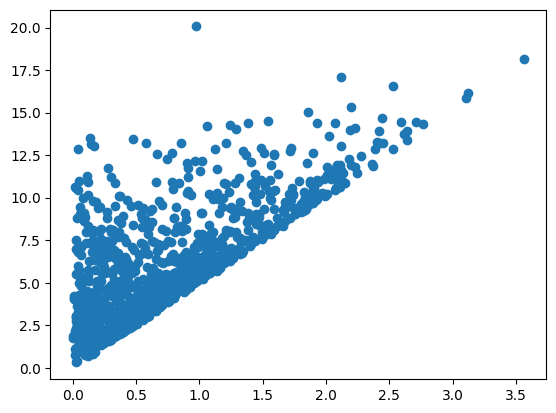

In [8]:
plt.scatter(x2_abs, y_train);

In [9]:
modif_mse_train,modif_mse_test=linear_model(df_train,y_train,df_test,y_test)
print("MSE train:", modif_mse_train)
print("MSE test:", modif_mse_test)


MSE train: 0.009910507522821474
MSE test: 0.009936287972693272


In [459]:
from sklearn.preprocessing import PolynomialFeatures


best_mse = np.inf #set to infinity at the beginning because any other would be better
best_degree = 1  # Start with linear features.
model = LinearRegression()

for degree in range(2, 8):  # check up to 7th degree
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(x_train)
    X_test_poly = poly_features.transform(x_test)
    
    model.fit(X_train_poly, y_train)
    y_pred_poly = model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    
    if mse_poly < best_mse:
        best_mse = mse_poly
        best_degree = degree

print(f"best MSE with Polynomial Features (Degree {best_degree}): {best_mse}")


best MSE with Polynomial Features (Degree 6): 0.1746019540795059


## **TASK 1** subtask 2

**REPORT**

1. When depicting the data for classification, it can be seen that they are arranged in circles/rings. There are 6 classes in the dataset based on training data (but in test set there are only 4 appearing, that's why confusion matrix does not have labels -1.0 and 4.0), so the centre of the circle was defined for each class to be able to calculate the radius and angle. 

2. confusion matrix (also provided below)

![confusion_matrix](confusion_matrix.png)

3. In provided dataset there are classes that are sparsely represented, which could pose a challenge when attempting to predict the labels in the test set later on. It can be deducted from the confusion matrix, that the most representative label in dataset is label 1.0.  For classes that overlap, the algorithm has difficulty in classifying the correct label. 

I set maximal number of iteration to max_iter=100000, provided result on image. Each time the code is run, the result may vary, but accuracy mentioned was reached.

![accuracy](accuracy.png)

In [384]:
# Load the dataset
hf = h5py.File('toy-classification.h5', 'r')
cx_train = np.array(hf.get('x_train'))
cy_train = np.array(hf.get('y_train'))
cx_test = np.array(hf.get('x_test'))
cy_test = np.array(hf.get('y_test'))

print(cx_train.shape, cx_test.shape)
hf.close()


(1000, 2) (1000, 2)


In [385]:
#checking how many classes are in the dataset

uniq_vals= np.unique(cy_train)
for i in uniq_vals:
    print(f"Number of features with label {i}:",np.count_nonzero(cy_train == i))

print("Classes in dataset: ",len(uniq_vals))

Number of features with label -1.0: 1
Number of features with label 0.0: 430
Number of features with label 1.0: 423
Number of features with label 2.0: 138
Number of features with label 3.0: 7
Number of features with label 4.0: 1
Classes in dataset:  6


In [229]:
# uniq_vals= np.unique(cy_test)
# for i in uniq_vals:
#     print(f"Number of features with label {i}:",np.count_nonzero(cy_test == i))

# print("Classes in dataset: ",len(uniq_vals))

Number of features with label 0.0: 372
Number of features with label 1.0: 500
Number of features with label 2.0: 114
Number of features with label 3.0: 14
Classes in dataset:  4


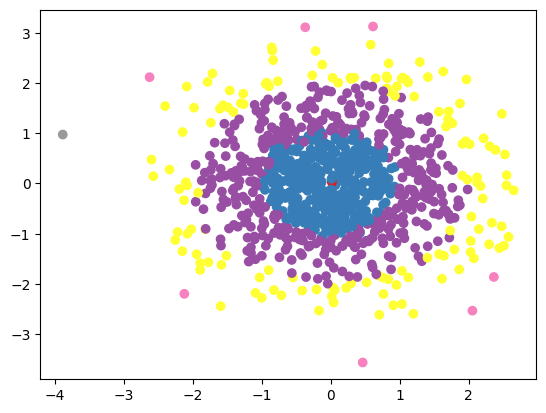

In [392]:
plt.scatter(cx_train[:, 0], cx_train[:, 1], c=cy_train, cmap='Set1');


In [453]:

# Create centres of each circle
center1 = np.array([0, 0])  # Center of the first circle
center2 = np.array([0.5, 0.5])  # Center of the second circle
center3 = np.array([0.75, 1])  # Center of the third circle
center4 = np.array([1, 1.5])  # Center of the fourth circle
center5 = np.array([1, -0.75]) # Center of the fifth circle
center6 = np.array([-4, 1]) # Center of the sixth circle

centers=[center1,center2,center3,center4,center5,center6]


#calculating radius for data adjusted with centres
def calculate_radius(data, center):
    return np.sqrt((data[:,0]-center[0])**2 + (data[:,1]-center[1])**2)

# calculating angles adjusted by centres
def calculate_angle(data, center):
    return np.arctan2(data[:, 1] - center[1], data[:, 0] - center[0])

angle_features_train=np.array([calculate_angle(cx_train, center) for center in centers])
angle_features_test=np.array([calculate_angle(cx_test, center) for center in centers])


#creating offset features (Euclidean distances to the centers)
offset_features = np.array([calculate_radius(cx_train,center) for center in centers])
offset_features_test = np.array([calculate_radius(cx_test, center) for center in centers])



X_train= np.column_stack((offset_features.T,angle_features_train.T,np.exp(offset_features.T)))
X_test=np.column_stack((offset_features_test.T,angle_features_test.T,np.exp(offset_features_test.T)))


print(X_train.shape)

(1000, 18)


In [457]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,  ConfusionMatrixDisplay  #imported to show confusion matrix

# SVM
svm_model = LinearSVC( max_iter=100000)

svm_model.fit(X_train, cy_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(cy_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")


accuracy: 95.10%


c:\Users\agnie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


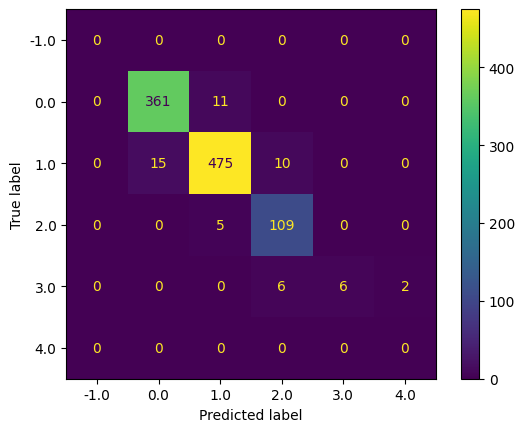

In [458]:
c_m = confusion_matrix(cy_test, y_pred, labels=svm_model.classes_)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=c_m,
                               display_labels=svm_model.classes_)
conf_matrix.plot()
plt.show()

# *Task 2  Estimating Generalization Errors*

In [235]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

df_housing = fetch_california_housing(as_frame=True)

print('shape', df_housing.data.shape)
print('features', df_housing.feature_names,'\n\n')
df_housing = df_housing.frame

shape (20640, 8)
features ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 




## **TASK 2** subtask 1

**REPORT**
1. MSEs: 
    * MSE train: 0.5229818274185227 
    * MSE test: 0.5275236518754022

2. MSEs for polynomial of degree 2: 
    * MSE train: 0.3977
    * MSE test: 20.7959
    

3. It can be observed, that for linear regression without polynomial features the MSE for training and test data is similar, but looking at the polynomial model, there is a big difference between MSE for training set and test set, it may better learn on training set, but the predictions are way worse than in normal model without polynomial features.

In [239]:
from sklearn.preprocessing import MinMaxScaler
X = df_housing.iloc[:,:-1]
y = df_housing.iloc[:,-1]


hx_train, hx_test, hy_train, hy_test = train_test_split(X,y, test_size=0.7, shuffle=True,random_state=42)
print("train set count: ",hx_train.shape, "\ntest set count: ",hx_test.shape)

trans = MinMaxScaler()
hx_train = trans.fit_transform(hx_train)
hx_test = trans.transform(hx_test)


train set count:  (6192, 8) 
test set count:  (14448, 8)


In [240]:
# MSEs on data without any modifications
mse_train2,mse_test2=linear_model(hx_train,hy_train,hx_test,hy_test)

print("MSE train:", mse_train2,"\nMSE test:", mse_test2)

MSE train: 0.5229818274185227 
MSE test: 0.5275236518754022


-------------------------------------------------------------------------------------------------------------

In [241]:
from sklearn.preprocessing import PolynomialFeatures

#degree
d= 2
#polynomial features
poly_features = PolynomialFeatures(degree=d)
x_train_poly = poly_features.fit_transform(hx_train)
x_test_poly = poly_features.transform(hx_test)

mse_train_poly,mse_test_poly=linear_model(x_train_poly,hy_train,x_test_poly,hy_test)

print(f"Polynomial Features of degree {d} ")
print(f"MSE train: {mse_train_poly:.4f}")
print(f"MSE test: {mse_test_poly:.4f}")


Polynomial Features of degree 2 
MSE train: 0.3977
MSE test: 20.7959


## **TASK 2** subtask 2

**REPORT**
1. MSE for Monte-carlo CV for one iteration: 
    * MSE train set: 0.5199196215572961
    * MSE validation set: 0.551439097940494

    MSE for k-fold CV: 
    * MSE train set:  0.5184906589293926 
    * MSE validation set: 2.8632948987791553

2. comparison MSE with one in previous task: during cross validation we can notice, that MSE varies from previous task. With the use of cross-validation we can prevent overfitting in data and have the model better trained to predict values.

3. Monte Carlo for 20 iterations: 
    * Mean of MSEs on training data:  0.5166243284013884
    * Mean of MSEs on validation data:  4.090343145944323
    * Variance of MSEs on training data:  0.00022541925948198617
    * Variance of MSEs on validation data:  71.95174120518642

4. K-fold with k=10:
    Mean MSE in 20 iterations with k=10:
    * Mean of MSEs on training data:  0.51836267559454
    * Mean of MSEs on validation data:  3.0347107498562713

    Variance MSE in 20 iterations with k=10:
    * Variance of MSEs on training data:  5.653518448226933e-08
    * Variance of MSEs on validation data:  0.05429029482127475
        

5. K-fold with k=20: in case of greater number of folds, we reach smaller MSE in both cases: for training set and also for validation set. 

    Mean MSE in 20 iterations with k=20:

    * Mean of MSEs on training data:  0.520662851707052
    * Mean of MSEs on validation data:  3.0725383080137365

    Variance MSE in 20 iterations with k=20:
    * Variance of MSEs on training data:  1.0809096866568164e-08
    * Variance of MSEs on validation data:  0.044766671077601725

In [372]:

#function for Monte Carlo cross-validation
def monte_carlo_cross_validation(X, y, test_size):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size,random_state=42)
    mse_train,mse_valid=linear_model(X_train,y_train,X_valid,y_valid)
    return [mse_train,mse_valid]


mse_train,mse_valid=(monte_carlo_cross_validation(hx_train,hy_train,0.1))
print("MSE train for monte-carlo:",mse_train,"\nMSE validation for monte-carlo:",mse_valid)




MSE train for monte-carlo: 0.5199196215572961 
MSE validation for monte-carlo: 0.551439097940494


In [373]:
def MC_reps(X, y,test_size, iter):
    mse_values = []
    
    for i in range(iter):
        np.random.seed(i)
        data = np.column_stack((X, y))
        
          #random seed
        np.random.shuffle(data)

        X_shuffled = data[:, :-1]  
        y_shuffled = data[:, -1]   

        mse = monte_carlo_cross_validation(X_shuffled, y_shuffled, test_size)
        mse_values.append(mse)
    return mse_values


mse_values= np.array(MC_reps(hx_train, hy_train, test_size=0.1,iter=20))

print(mse_values)
mc_mse_train = np.mean(mse_values[:,0])
mc_var_mse_train= np.var(mse_values[:,0])
mc_mse_valid = np.mean(mse_values[:,1])
mc_var_mse_valid=np.var(mse_values[:,1])


print("Mean of MSEs on training data: ", mc_mse_train)
print("Mean of MSEs on validation data: ", mc_mse_valid)
print("Variance of MSEs on training data: ", mc_var_mse_train)
print("Variance of MSEs on validation data: ", mc_var_mse_valid)


[[ 0.52528871  0.50537326]
 [ 0.51816635  0.56723384]
 [ 0.52943654  0.46681752]
 [ 0.48267237 23.58508613]
 [ 0.52014797  0.54897559]
 [ 0.47954908 24.82984261]
 [ 0.48474213 24.41530408]
 [ 0.51991636  0.55302168]
 [ 0.52501788  0.50601885]
 [ 0.52700315  0.48927494]
 [ 0.52696597  0.48840573]
 [ 0.52069489  0.54496341]
 [ 0.512182    0.62217642]
 [ 0.51795126  0.58077968]
 [ 0.52496395  0.50568097]
 [ 0.52332068  0.52223681]
 [ 0.51950238  0.55608747]
 [ 0.52732335  0.48655377]
 [ 0.52805395  0.47862761]
 [ 0.51958758  0.55440257]]
Mean of MSEs on training data:  0.5166243284013884
Mean of MSEs on validation data:  4.090343145944323
Variance of MSEs on training data:  0.00022541925948198617
Variance of MSEs on validation data:  71.95174120518642


In [374]:
def k_fold_cross_validation(X, y, k):
    n = len(y)
    fold_size = n // k  #how many data in one fold 
    MSEs = []
    for i in range(k):
        # indices
        start = i * fold_size #n first iteration: 0*fold, then 1*fold
        end = start + fold_size if i < k-1 else n

        #current fold as a validation set
        X_valid = X[start:end]
        y_valid = y[start:end]

        #the rest of folds as training set
        X_train = np.vstack((X[:start], X[end:]))
        y_train= np.hstack((y[:start], y[end:]))
        mse_train,mse_valid=linear_model(X_train,y_train,X_valid,y_valid)
        MSEs.append([mse_train,mse_valid])
    mean_mse_train = np.mean([mse[0] for mse in MSEs])
    mean_mse_test= np.mean([mse[1] for mse in MSEs])
    return [mean_mse_train, mean_mse_test]

mse_train,mse_valid= k_fold_cross_validation(hx_train,hy_train,k=10)
print("MSE train for k-fold CV: ",mse_train,"\nMSE validation for k-fold CV:",mse_valid)

MSE train for k-fold CV:  0.5184906589293926 
MSE validation for k-fold CV: 2.8632948987791553


In [375]:

def k_fold_reps(X, y, k,iter):
    metrics=[]
 
    for i in range(iter):
        data = np.column_stack((X, y))
          
        np.random.seed(i)
        np.random.shuffle(data)

        X_shuffled = data[:, :-1]  
        y_shuffled = data[:, -1]  
        mses=k_fold_cross_validation(X_shuffled,y_shuffled,k)
        metrics.append(mses)
    return metrics


ten_folds= np.array(k_fold_reps(hx_train,hy_train,k=10,iter=20))


k_folds_mse_train = np.mean( ten_folds[:,0])
k_folds_mse_valid = np.mean(ten_folds[:,1])
k_folds_var_mse_train = np.var(ten_folds[:,0])
k_folds_var_mse_valid = np.var(ten_folds[:,1])

print("MSEs : ", ten_folds)
print("\nMean MSE in 20 iterations with k=10:",)
print("Mean of MSEs on training data: ", k_folds_mse_train)
print("Mean of MSEs on validation data: ", k_folds_mse_valid)

print("\nVariance MSE in 20 iterations with k=10:",)
print("Variance of MSEs on training data: ", k_folds_var_mse_train)
print("Variance of MSEs on validation data: ", k_folds_var_mse_valid)

MSEs :  [[0.51836409 3.16910001]
 [0.51817841 3.11695436]
 [0.51849581 2.90392957]
 [0.51857415 2.77255246]
 [0.51850752 2.8949088 ]
 [0.51838243 2.90645568]
 [0.51828939 3.2172908 ]
 [0.5180384  3.15088916]
 [0.5187033  2.71994743]
 [0.51856886 2.802028  ]
 [0.51831886 3.28356086]
 [0.51854833 2.96809193]
 [0.51854756 2.79832072]
 [0.51847447 2.92969953]
 [0.5184675  2.86671485]
 [0.5183695  2.8831659 ]
 [0.5175953  3.70886232]
 [0.51811909 3.30251744]
 [0.51832822 3.18155409]
 [0.51838231 3.11767111]]

Mean MSE in 20 iterations with k=10:
Mean of MSEs on training data:  0.51836267559454
Mean of MSEs on validation data:  3.0347107498562713

Variance MSE in 20 iterations with k=10:
Variance of MSEs on training data:  5.653518448226933e-08
Variance of MSEs on validation data:  0.05429029482127475


In [371]:
twenty_folds= np.array(k_fold_reps(hx_train,hy_train,k=20,iter=20))
twenty_folds

k20_folds_mse_train = np.mean( twenty_folds[:,0])
k20_folds_mse_valid = np.mean(twenty_folds[:,1])
k20_folds_var_mse_train = np.var(twenty_folds[:,0])
k20_folds_var_mse_valid = np.var(twenty_folds[:,1])


print("MSEs : ", twenty_folds)
print("\nMean MSE in 20 iterations with k=20:",)
print("Mean of MSEs on training data: ", k20_folds_mse_train)
print("Mean of MSEs on validation data: ", k20_folds_mse_valid)

print("\nVariance MSE in 20 iterations with k=20:",)
print("Variance of MSEs on training data: ", k20_folds_var_mse_train)
print("Variance of MSEs on validation data: ", k20_folds_var_mse_valid)

MSEs :  [[0.5206527  3.26526747]
 [0.52056862 3.19471532]
 [0.52074749 2.95898436]
 [0.52069904 2.95667871]
 [0.52070866 2.97415895]
 [0.52071605 2.94666101]
 [0.52069502 3.04855724]
 [0.52053881 3.21803103]
 [0.52068966 2.93492613]
 [0.5207436  2.90427041]
 [0.5206492  3.06632706]
 [0.5204198  3.68241668]
 [0.52071612 2.90924067]
 [0.52078139 2.87700841]
 [0.52074657 2.90626864]
 [0.52075961 2.91591924]
 [0.52042531 3.41730711]
 [0.52055026 3.35841011]
 [0.52074572 2.90102688]
 [0.52070341 3.01459074]]

Mean MSE in 20 iterations with k=20:
Mean of MSEs on training data:  0.520662851707052
Mean of MSEs on validation data:  3.0725383080137365

Variance MSE in 20 iterations with k=20:
Variance of MSEs on training data:  1.0809096866568164e-08
Variance of MSEs on validation data:  0.044766671077601725


# **TASK 2** subtask 3 - Model Selection

**REPORT**

1. Polynomial model on linear regression: best one considering train set: degree 5, but considering test set, it would be degree 1. 
    1) Degree 1
    * MSE train  0.5229818274185227 
    * MSE test:  0.5275236518754022
    2) Degree 2 
    * MSE train  0.3977408489017094 
    * MSE test:  20.79590845467597
    3) Degree 3 
    * MSE train  0.3280566717687914 
    * MSE test:  442244.95783908595
    4) Degree 4 
    * MSE train  0.25584502427014105 
    * MSE test:  451955405758.62604
    5) Degree 5 
    * MSE train  0.18783509924844877 
    * MSE test:  2.6626869270976186e+17

2. with training data split in 50/50: again the same results: training set: degree 5, validation set: degree 1. 
    1) Degree 1 
    * MSE train  0.49416842422192164 
    * MSE test:  3.9306001926604206
    2) Degree 2 
    * MSE train  0.38889186962059435 
    * MSE test:  10949.73812144167
    3) Degree 3 
    * MSE train  0.3135519435965632 
    * MSE test:  399076194.4378809
    4) Degree 4 
    * MSE train  0.225598392611876 
    * MSE test:  1794061319484.4817
    5) Degree 5 
    * MSE train  0.1371034005120827 
    * MSE test:  1.2842835617979407e+18

3. 10-fold CV: the decision considering training data would be degree 5, taking into consideration validation set, it indicates degree 1.

4. 20-fold CV: the decision considering training data would be degree 5, taking into consideration validation set, it indicates degree 1.
    

5. It seems that considering either training data - which indicates degree 5, and validation/test data, it indicates degree 1, so results do not differ, but the differences between training MSE and test/validation MSE gets bigger as the degree is higher. Considering every method used, I would reccommend using cross-validation as it prevents from overfitting and is considered as a good practice, when implemented correctly, and when folds are chosen respectively.

# 1) 

In [380]:
def poly_algorithm(x_train,y_train,x_test,y_test,degrees):
    p = degrees
 

    print(x_train.shape,y_train.shape)
    for degree in p:
        #polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(x_train)
        X_test_poly=poly_features.transform(x_test)
        # linear regression fit
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # predict on training
        y_pred_train= model.predict(X_train_poly)
        y_pred_test=model.predict(X_test_poly)
        #MSE on the training data
        mse_tr = mean_squared_error(y_train, y_pred_train)
        mse_te = mean_squared_error(y_test, y_pred_test)
        print("Degree",degree,"MSE train ",mse_tr,"\nMSE test: ",mse_te)
        

    return [mse_tr,mse_te]

vals=poly_algorithm(hx_train, hy_train,hx_test, hy_test,[1, 2, 3, 4, 5])


(6192, 8) (6192,)
Degree 1 MSE train  0.5229818274185227 
MSE test:  0.5275236518754022
Degree 2 MSE train  0.3977408489017094 
MSE test:  20.79590845467597
Degree 3 MSE train  0.3280566717687914 
MSE test:  442244.95783908595
Degree 4 MSE train  0.25584502427014105 
MSE test:  451955405758.62604
Degree 5 MSE train  0.18783509924844877 
MSE test:  2.6626869270976186e+17


# 2)

In [377]:
from sklearn.model_selection import cross_val_score

train_x, validation_x, train_y, validation_y = train_test_split(hx_train, hy_train, test_size=0.5, random_state=42)


poly_algorithm(train_x,train_y,validation_x,validation_y,[1, 2, 3, 4, 5])

(3096, 8) (3096,)
Degree 1 MSE train  0.49416842422192164 
MSE test:  3.9306001926604206
Degree 2 MSE train  0.38889186962059435 
MSE test:  10949.73812144167
Degree 3 MSE train  0.3135519435965632 
MSE test:  399076194.4378809
Degree 4 MSE train  0.225598392611876 
MSE test:  1794061319484.4817
Degree 5 MSE train  0.1371034005120827 
MSE test:  1.2842835617979407e+18


[0.1371034005120827, 1.2842835617979407e+18]

# 3)  

In [378]:
degrees= [1, 2, 3, 4, 5]


for degr in degrees:
    poly_features = PolynomialFeatures(degree=degr)
    X_train_poly = poly_features.fit_transform(hx_train)
    X_test_poly= poly_features.transform(hx_test)
    mse=k_fold_cross_validation(X_train_poly, hy_train, 10)
    print("For degree", degr, "\nmean MSE train is: ",mse[0],"\nmean MSE validation is: ",mse[1])
    

For degree 1 
mean MSE train is:  0.5184906589293926 
mean MSE validation is:  2.8632948987791793
For degree 2 
mean MSE train is:  0.3951380752027675 
mean MSE validation is:  7415.695881519275
For degree 3 
mean MSE train is:  0.32517917014794584 
mean MSE validation is:  136005748.57212278
For degree 4 
mean MSE train is:  0.25232991023441276 
mean MSE validation is:  373595696231.69495
For degree 5 
mean MSE train is:  0.1811341065687905 
mean MSE validation is:  3.132948319686543e+16


# 4)

In [379]:
for degr in degrees:
    poly_features = PolynomialFeatures(degree=degr)
    X_train_poly = poly_features.fit_transform(hx_train)
    X_test_poly= poly_features.transform(hx_test)
    mse=k_fold_cross_validation(X_train_poly, hy_train, 20)
    print("For degree", degr, "\nthe mean MSE train: ",mse[0],"\nthe mean MSE test: ",mse[1])
    

For degree 1 
the mean MSE train:  0.5207736607388773 
the mean MSE test:  2.897221943983153
For degree 2 
the mean MSE train:  0.3965090775502499 
the mean MSE test:  7032.156864688162
For degree 3 
the mean MSE train:  0.32677287572715036 
the mean MSE test:  124437255.4957871
For degree 4 
the mean MSE train:  0.2541925572923919 
the mean MSE test:  305460023309.5394
For degree 5 
the mean MSE train:  0.18467154321258664 
the mean MSE test:  4.2344742255023576e+16
